数据增强

In [1]:
import data_process
import cv2
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import glob

CV_LOAD_IMAGE_COLOR = 1 # set flag to 1 to give colour image
CV_LOAD_IMAGE_COLOR = 0 # set flag to 0 to give a grayscale one
%matplotlib inline

random.seed (0)

In [2]:
def get_num_files(path):
    """获取文件个数，包括子文件夹？？"""
    if not os.path.exists(path):
        return 0
    file_list = glob.glob(os.path.join(path, "*"))
    return file_list

In [3]:
cats_path = 'processed_train_data/cats'
cats_files = glob.glob(os.path.join(cats_path, "*"))

In [4]:
dogs_path = 'processed_train_data/dogs'
dogs_files = glob.glob(os.path.join(dogs_path, "*"))

读取单张图片，不要一次性全部读取

In [5]:
def image_read(file):
    return cv2.imread(file)

In [6]:
def showimgs(imgs,origin_title,changed_title):
    plt.subplot(1,2,1)
    plt.imshow(imgs[0])
    plt.title(origin_title)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(imgs[1])
    plt.title(changed_title)
    plt.axis('off')
    plt.show()

In [7]:
#原图复制
def image_origin(file):
    img_org = image_read(file)
    img_aft = img_org
    return [img_org,img_aft]

In [8]:
#上下翻转
def image_upsidedown(file):
    img_org = image_read(file)
    img_aft = np.flipud(img_org)
    return [img_org,img_aft]

In [9]:
#左旋
def image_spr_l(file):
    img_org = image_read(file)
    img_aft=np.rot90(img_org)
    return [img_org,img_aft]

In [10]:
#右旋
def image_spr_r(file):
    img_org = image_read(file)
    img_aft=np.rot90(np.rot90(np.rot90(img_org)))
    return [img_org,img_aft]

In [11]:
#亮度、对比度改变
def image_change_brightness(file, gamma=None):
    if gamma==None:
        brightness =  []
        brightness.append(np.random.uniform(1,1.5))   #变量
        brightness.append(np.random.uniform(0.75,1)) #变暗
        gamma = random.sample(brightness,1)[0]


    invGamma = 1.0 / gamma
    img_org = image_read(file)
    
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    img_aft = cv2.LUT(img_org, table)
    return [img_org, img_aft]

In [12]:
def img_to_file(img,origin_file,suffix = "chg"):
    """保存图片
    img:图片数据
    orgin_file:原始图片名
    suffix　：图片名添加的后缀
    """
    newfilename = origin_file.rsplit('.', 1)[0] + "_"+ suffix + "." + origin_file.rsplit('.', 1)[1]
    cv2.imwrite(newfilename,img)

In [13]:
def images_turboboost(files,show_img=False):
    """图片数据增强，使用复制方式"""
    """
    20%上下翻转
    20%左旋
    20%右旋
    40%亮度随机改变（0.5-1）
    每个图片都没有重复处理
    """
    
    
    upsidedown_rate = 0 #翻转图片比例
    rot_r_rate = 0 #右旋比例
    rot_l_rate =0  #左旋比例
    change_bri_rate = 0.4 #亮度改变比例
    origin_rate = 0  #原图复制
    #总共处理多少图片比例
    sum_rate = upsidedown_rate + rot_r_rate + rot_l_rate + change_bri_rate + origin_rate
    if sum_rate > 1:
        sum_rate = 1
    
    file_nb = len(files) #图片数量
    deal_nb = int(file_nb*sum_rate)  #需要处理的图片数量
    random_index = random.sample(range(0,file_nb),deal_nb)  #对需要处理的图片随机抽样
    
    showimg_1 = show_img
    showimg_2 = show_img
    showimg_3 = show_img
    showimg_4 = show_img
    showimg_5 = False #原图不打印
    
    for i in range(deal_nb):
        imgs = []
        filepath, file_name =  os.path.split(files[random_index[i]])
        if i < file_nb * upsidedown_rate:
            """上下翻转"""
            imgs = image_upsidedown(files[random_index[i]])
            if showimg_1:
                showimg_1=False  
                showimgs(imgs,file_name,"Upside_down") 
            img_to_file(imgs[1],files[random_index[i]],suffix="upd")
            
        elif i < file_nb * (upsidedown_rate + rot_r_rate):
            """左旋"""
            imgs = image_spr_l(files[random_index[i]])
            if showimg_2:
                showimg_2 = False
                showimgs(imgs,file_name,"L_rotate")
            img_to_file(imgs[1],files[random_index[i]],suffix="lrotate")
            
        elif i < file_nb * (upsidedown_rate + rot_r_rate + rot_l_rate):
            """右旋"""
            imgs = image_spr_r(files[random_index[i]])
            if showimg_3:
                showimg_3 = False
                showimgs(imgs,file_name,"R_rotate")
            img_to_file(imgs[1],files[random_index[i]],suffix="rrotate")
        
        elif i < file_nb * (upsidedown_rate + rot_r_rate + rot_l_rate +change_bri_rate):
            """改变亮度"""
            imgs = image_change_brightness(files[random_index[i]])
            if showimg_4:
                showimg_4 = False
                showimgs(imgs,file_name,"Ch_bright")
            img_to_file(imgs[1],files[random_index[i]],suffix="chbright")
            
        elif i < file_nb * (upsidedown_rate + rot_r_rate + rot_l_rate +change_bri_rate +origin_rate):
            """原图复制"""
            imgs = image_change_brightness(files[random_index[i]])
            if showimg_5:
                showimg_5 = False
                showimgs(imgs,file_name,"Origin")
            img_to_file(imgs[1],files[random_index[i]],suffix="origin")

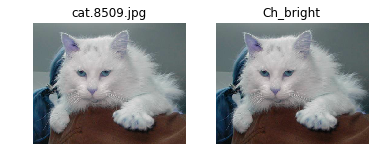

In [14]:
images_turboboost(cats_files,True)

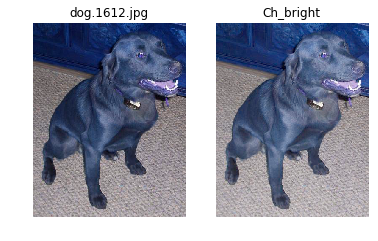

In [15]:
images_turboboost(dogs_files,True)